In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
def CohenEffectSize(group1, group2):
    
        diff = group1.mean() - group2.mean()

        var1 = group1.var()
        var2 = group2.var()
        n1, n2 = len(group1), len(group2)

        pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
        d = diff / np.sqrt(pooled_var)
        return d


# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [4]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [5]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

In [6]:
df["Age"]

0        45
1        21
2        38
3        48
4        18
         ..
15987    22
15988    20
15989    37
15990    47
15991    40
Name: Age, Length: 15992, dtype: int64

In [7]:
#Generating Histogram Objects

hist_age = thinkstats2.Hist(df["Age"], label="Age")
hist_age

Hist({29: 660, 28: 649, 27: 584, 26: 583, 25: 547, 24: 523, 21: 505, 23: 503, 18: 476, 22: 470, 32: 470, 30: 467, 19: 465, 31: 458, 33: 454, 20: 454, 34: 426, 17: 395, 35: 386, 36: 363, 38: 346, 16: 338, 37: 336, 39: 323, 51: 314, 40: 312, 41: 312, 47: 310, 45: 310, 42: 309, 55: 307, 50: 306, 48: 303, 53: 300, 49: 297, 52: 294, 46: 293, 44: 290, 43: 284, 54: 270}, 'Age')

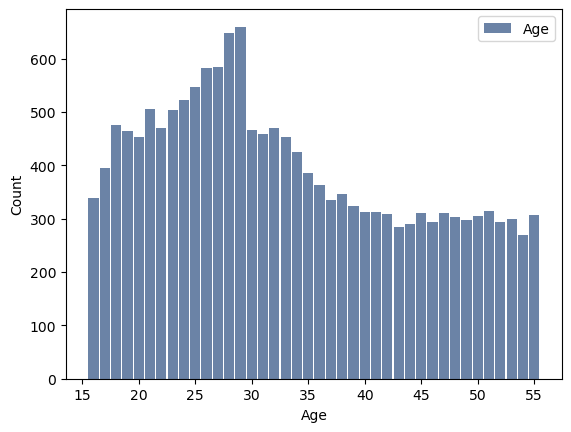

In [8]:
# Plotting Histogram

from cProfile import label


thinkplot.Hist(hist_age)
thinkplot.config(xlabel ="Age", ylabel ="Count")

In [9]:
# Create Pmfs

pmf_age= thinkstats2.Pmf(df["Age"])
pmf_age



Pmf({29: 0.04127063531765883, 28: 0.04058279139569784, 27: 0.03651825912956478, 26: 0.03645572786393196, 25: 0.03420460230115057, 24: 0.03270385192596298, 21: 0.03157828914457229, 23: 0.03145322661330665, 18: 0.029764882441220608, 22: 0.02938969484742371, 32: 0.02938969484742371, 30: 0.029202101050525262, 19: 0.029077038519259628, 31: 0.028639319659829913, 33: 0.028389194597298648, 20: 0.028389194597298648, 34: 0.026638319159579787, 17: 0.02469984992496248, 35: 0.02413706853426713, 36: 0.022698849424712356, 38: 0.021635817908954476, 16: 0.021135567783891945, 37: 0.02101050525262631, 39: 0.0201975987993997, 51: 0.01963481740870435, 40: 0.01950975487743872, 41: 0.01950975487743872, 47: 0.019384692346173085, 45: 0.019384692346173085, 42: 0.01932216108054027, 55: 0.019197098549274635, 50: 0.01913456728364182, 48: 0.01894697348674337, 53: 0.01875937968984492, 49: 0.01857178589294647, 52: 0.018384192096048024, 46: 0.018321660830415205, 44: 0.018134067033516756, 43: 0.01775887943971986, 54: 0

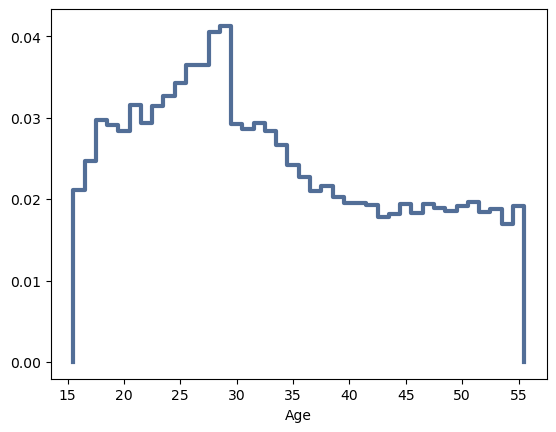

<Figure size 800x600 with 0 Axes>

In [10]:
#Plotting pmf

thinkplot.Pmf((pmf_age))
thinkplot.show(xlabel="Age")

#### What fraction of the people in the data are 51? What fraction are older than 51?

Fraction of people who are 51

In [11]:
#Using pmf

age_low = thinkstats2.Pmf(df["Age"] == 51)[True]
print("Percenage of people who are 51:" , round(age_low*100, 2),"%")


Percenage of people who are 51: 1.96 %


In [12]:
# Using cdf
cdf_age= thinkstats2.Cdf(df["Age"])
age_low=(cdf_age.PercentileRank(51))-(cdf_age.PercentileRank(50))
print("Percenage of people who are 51:" , round(age_low, 2),"%")

Percenage of people who are 51: 1.96 %


Fraction of people who are older than 51

In [13]:
#Using cdf


age_high = 100 - cdf_age.PercentileRank(51)
print("Percenage of people who are more than 51:" , round(age_high, 2),"%")

Percenage of people who are more than 51: 7.32 %


##### What is the median age?

In [14]:
median_age = df["Age"].median()
print("Median Age:" ,median_age)

Median Age: 31.0


##### Does the distribution of the sample data seem to mirror the working age population?

As per the distribution of sample data, age ranges from 19 to 54 which represents the working age population.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [93]:
#Percentile for demographics - education, race, nodeg, hisp,maritalstatus

l=["Eduacation", "Race", "Nodeg","Hisp","MaritalStatus"]
#j=1
for i in l:
   population_percent = df[i].value_counts()/len(df[i])
   print(population_percent*100)


HighSchool            39.094547
LessThanHighSchool    29.583542
Intermediate          16.933467
graduate               8.548024
PostGraduate           5.840420
Name: Eduacation, dtype: float64
NotBlack    92.646323
black        7.353677
Name: Race, dtype: float64
0    70.416458
1    29.583542
Name: Nodeg, dtype: float64
NotHispanic    92.796398
hispanic        7.203602
Name: Hisp, dtype: float64
Married       71.173087
NotMarried    28.826913
Name: MaritalStatus, dtype: float64


Based on real data,Population percentage based on demographics in the US during 1970s.
Around 91% of population were non black and around 6% of population were hispanic.
Married couples' households accounted for 71 percent of the nation's total.
Population with high school degree was asround 67%.

Based on the analysis, demographics features of the given data seems to be representative sample of the US population.

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

#1.Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
  
What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?

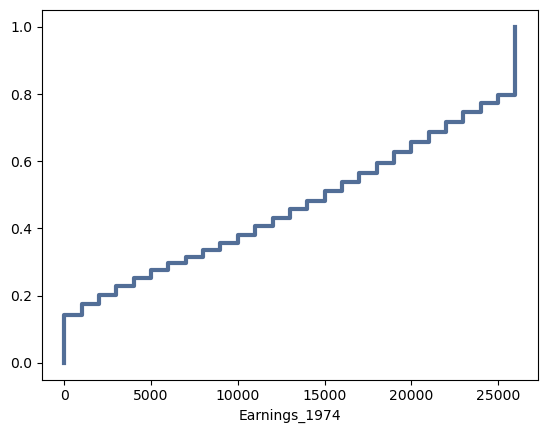

<Figure size 800x600 with 0 Axes>

In [94]:
# cdf grapgh for 1974 earnings
cdf_1974 = thinkstats2.Cdf(round(df["Earnings_1974"],-3))
thinkplot.Cdf((cdf_1974))
thinkplot.show(xlabel="Earnings_1974")

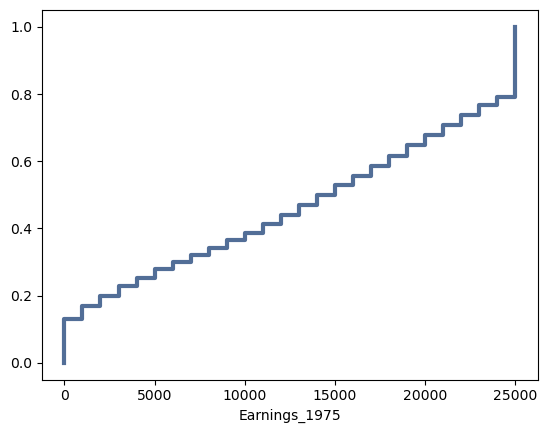

<Figure size 800x600 with 0 Axes>

In [95]:
# cdf grapgh for 1975 earnings
cdf_1975 = thinkstats2.Cdf(round(df["Earnings_1975"],-3))
thinkplot.Cdf((cdf_1975))
thinkplot.show(xlabel="Earnings_1975")

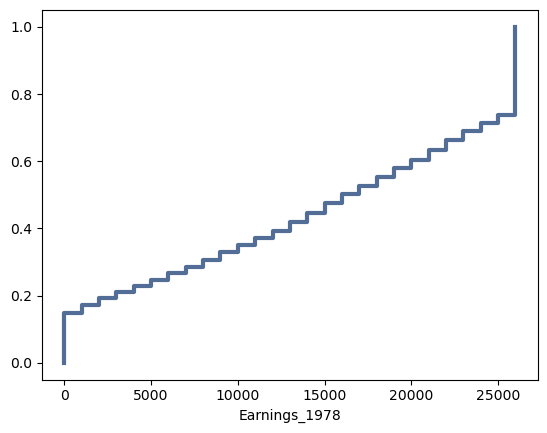

<Figure size 800x600 with 0 Axes>

In [96]:
# cdf grapgh for 1978 earnings
cdf_1978 = thinkstats2.Cdf(round(df["Earnings_1978"],-3))
thinkplot.Cdf((cdf_1978))
thinkplot.show(xlabel="Earnings_1978")


In [97]:
#Mean for 1974 and 1978 earnings

print("Mean_1974:" ,df["Earnings_1974"].mean())
print("Mean_1978:", df["Earnings_1978"].mean())


Mean_1974: 14016.800304191169
Mean_1978: 14846.659672906011


As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar between earnings of 1974 and 1978. The avergae earnings of 1974 and 1974 is around $14k to $15k.

##### What to Investigate Further


##### Histogram and PMF

#2. Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
   
What could you investigate further in an attempt to explain this?

In [98]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

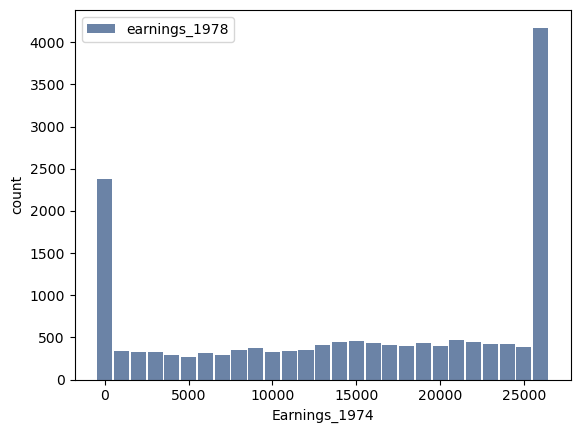

In [99]:
#Plotting histogram for earnings_1978

hist_1978 = thinkstats2.Hist(round(df["Earnings_1978"],-3), label="earnings_1978")
thinkplot.Hist(hist_1978)
thinkplot.config(xlabel="Earnings_1974", ylabel="count")

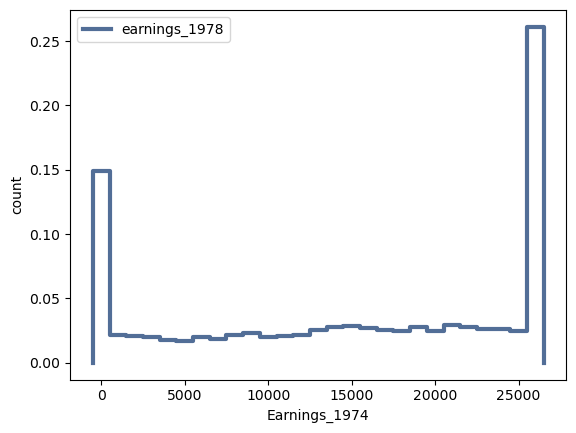

<Figure size 800x600 with 0 Axes>

In [100]:
#Plotting pmf for earnings_1978

pmf_1978 = thinkstats2.Pmf(round(df["Earnings_1978"],-3), label="earnings_1978")
thinkplot.Pmf(pmf_1978)
thinkplot.show(xlabel="Earnings_1974", ylabel="count")

In [101]:
#Stats for race

notBlack = df[df["Race"] == "NotBlack"]
black = df[df["Race"] == "black"]
print(notBlack["Earnings_1978"].describe())
print(black["Earnings_1978"].describe())

count    14816.000000
mean     15072.078992
std       9635.184976
min          0.000000
25%       5999.200500
50%      16894.110000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64
count     1176.000000
mean     12006.682951
std       9349.118836
min          0.000000
25%       2465.217500
50%      12115.880000
75%      20655.290000
max      25564.670000
Name: Earnings_1978, dtype: float64


In [102]:
print("Race Effectsize:", CohenEffectSize(notBlack["Earnings_1978"], black["Earnings_1978"]))

Race Effectsize: 0.31883255859070525


c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

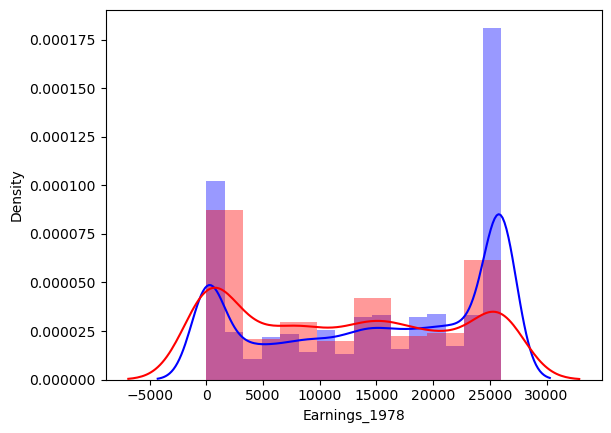

In [103]:
# sns plot for race

plt.ticklabel_format(style='plain', axis='x')
sns.distplot(round(notBlack["Earnings_1978"],-3), label="notBlack", color="Blue")
sns.distplot(round(black["Earnings_1978"],-3),label="black",color="Red")

In [104]:
#Stats for Hisp

notHisp = df[df["Hisp"] == "NotHispanic"]
hisp= df[df["Hisp"]=="hispanic"]
print(notHisp["Earnings_1978"].describe())
print(hisp["Earnings_1978"].describe())



count    14840.000000
mean     14959.218906
std       9685.372409
min          0.000000
25%       5719.910500
50%      16717.520000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64
count     1152.000000
mean     13396.677888
std       9023.243588
min          0.000000
25%       5266.986750
50%      13717.740000
75%      21944.977500
max      25564.670000
Name: Earnings_1978, dtype: float64


In [105]:
print("Hisp Effectsize:", CohenEffectSize(notHisp["Earnings_1978"], hisp["Earnings_1978"]))

Hisp Effectsize: 0.16210284395555566


c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

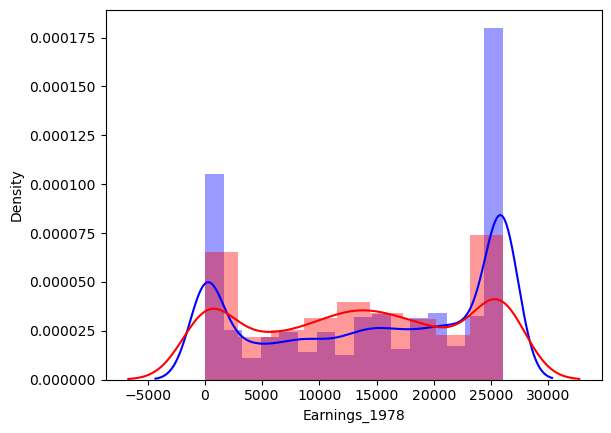

In [106]:
# sns plot for Hisp

plt.ticklabel_format(style='plain', axis='x')
sns.distplot(round(notHisp["Earnings_1978"],-3), label="notHispanic", color="Blue")
sns.distplot(round(hisp["Earnings_1978"],-3),label="hispanic",color="Red")

In [107]:
#Stats for Marital status

notmarried = df[df["MaritalStatus"] == "NotMarried"]
married= df[df["MaritalStatus"]=="Married"]
print(notmarried["Earnings_1978"].describe())
print(married["Earnings_1978"].describe())

count     4610.000000
mean     11033.720550
std       8669.880629
min          0.000000
25%       2965.797500
50%       9982.043000
75%      17812.145000
max      25564.670000
Name: Earnings_1978, dtype: float64
count    11382.000000
mean     16390.997167
std       9594.652211
min          0.000000
25%       8446.316000
50%      19664.850000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64


In [108]:
print("Marital status Effectsize:", CohenEffectSize(married["Earnings_1978"], notmarried["Earnings_1978"]))

Marital status Effectsize: 0.5737396692403472


c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

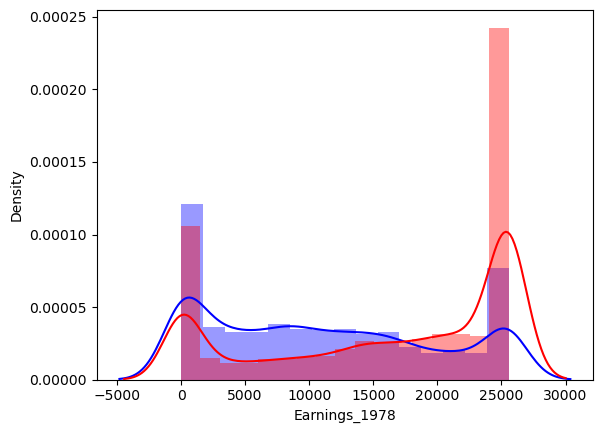

In [109]:
# sns plot for marital status

plt.ticklabel_format(style='plain', axis='x')
sns.distplot(notmarried["Earnings_1978"], label="NotMarried", color="Blue")
sns.distplot(married["Earnings_1978"],label="Married",color="Red")

In [110]:
# Stats for Nodeg

nodeg = df[df["Nodeg"] != 1]
deg = df[df["Nodeg"]== 1]
print(nodeg["Earnings_1978"].describe())
print(deg["Earnings_1978"].describe())

count    11261.000000
mean     15796.747484
std       9753.212109
min          0.000000
25%       6895.072000
50%      18693.240000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64
count     4731.000000
mean     12585.205679
std       8996.683952
min          0.000000
25%       4241.814000
50%      12412.900000
75%      20807.130000
max      25564.670000
Name: Earnings_1978, dtype: float64


In [111]:
print("Nodeg Effectsize:", CohenEffectSize(nodeg["Earnings_1978"], deg["Earnings_1978"]))

Nodeg Effectsize: 0.3367928897615812


c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

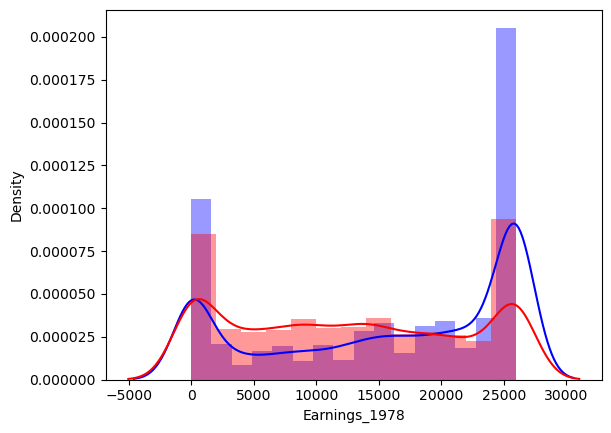

In [112]:
#sns plot for nodeg

plt.ticklabel_format(style='plain', axis='x')
sns.distplot(round(nodeg["Earnings_1978"],-3), label="NoDeg", color="Blue")
sns.distplot(round(deg["Earnings_1978"],-3),label="Deg",color="Red")

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

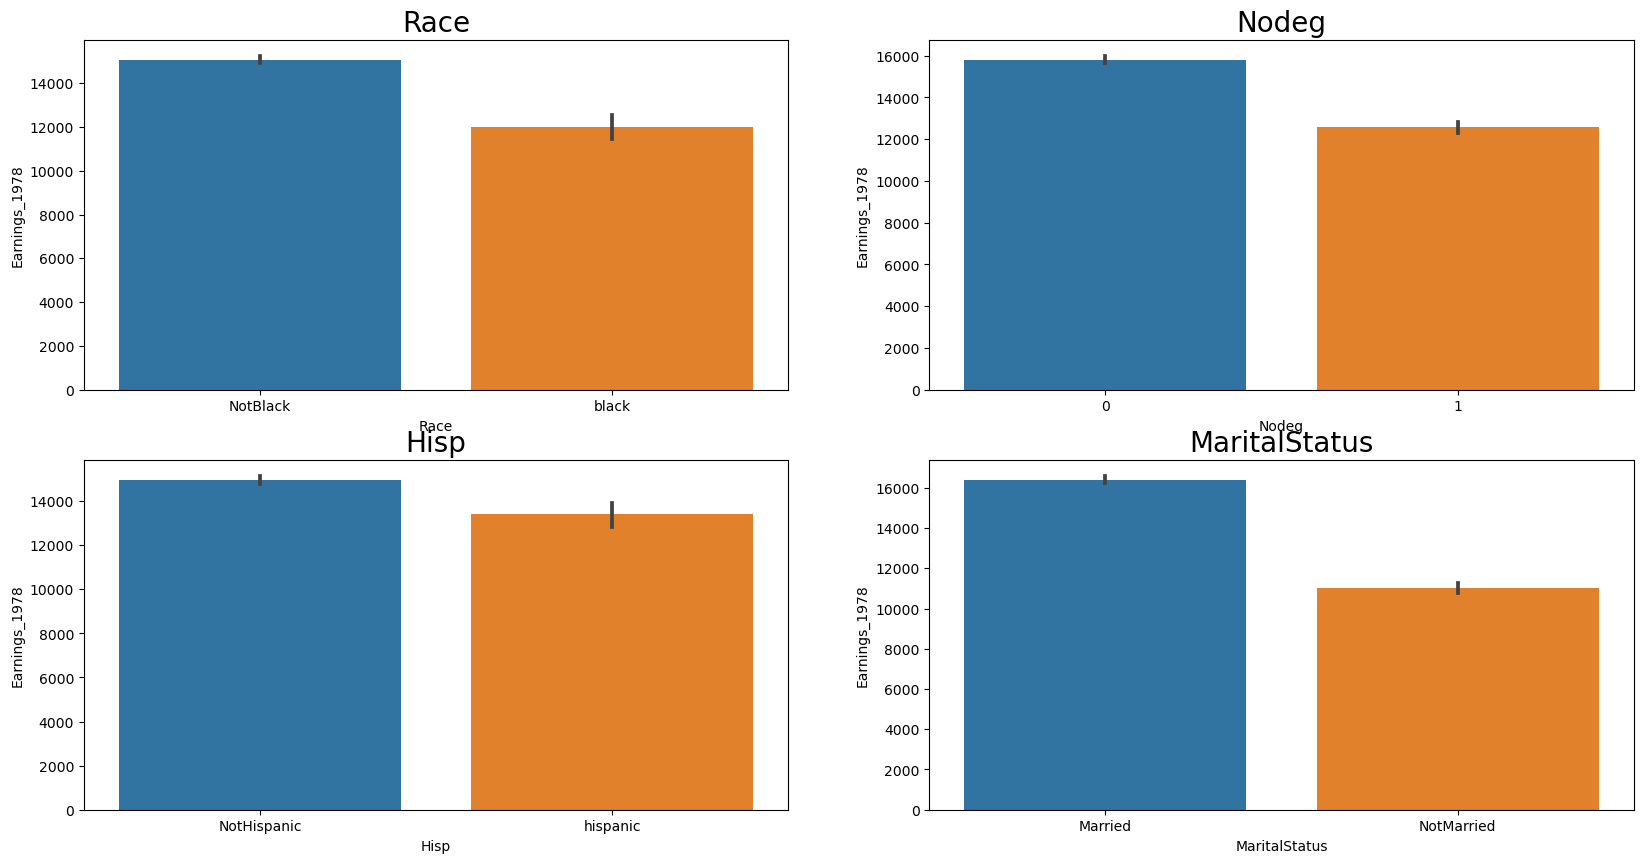

In [113]:
# sns plot for race, Hisp,Nodeg, MaritalStatus

l=["Race", "Nodeg","Hisp","MaritalStatus"]
j=1
plt.figure(figsize=(20,10))
for i in l:
    plt.subplot(2,2,j)
    sns.barplot(x=i,y=df["Earnings_1978"],data=df)
    plt.title(i, fontdict={'fontsize':'20'})
    j=j+1
plt.tight_layout

Conclusion on greatest effect size

Based on the analysis, marital status has the greatest effect size on 1978 earnings.
Effect size of marital status is 0.57 which is larger than race, hisp and nodeg.
Married population mean earnings is relatively greater than mean earnings of Non married population.  

##### Outliers

4. Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    
   What can you infer from the presence of outliers that may impact analysis of this data.


In [114]:
df["Earnings_1978"].describe()

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64

<AxesSubplot:xlabel='Earnings_1978', ylabel='Count'>

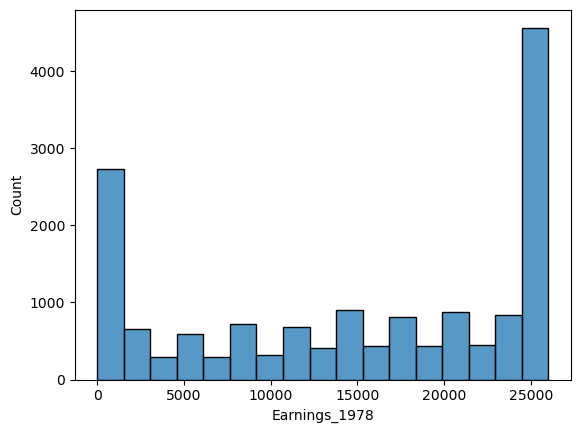

In [115]:
# sns plot for 1978 earnings with outliers

plt.ticklabel_format(style='plain', axis='x')
sns.histplot(round(df["Earnings_1978"],-3))

In [116]:
#Filtering outliers

df_out = df[df["Earnings_1978"] > 5000]
df_out=  df_out[df_out["Earnings_1978"] < 25000]
df_out["Earnings_1978"].describe()

count     7808.000000
mean     15634.539714
std       5586.418750
min       5000.627000
25%      11014.970000
50%      15813.150000
75%      20523.037500
max      24998.700000
Name: Earnings_1978, dtype: float64

<AxesSubplot:xlabel='Earnings_1978', ylabel='Count'>

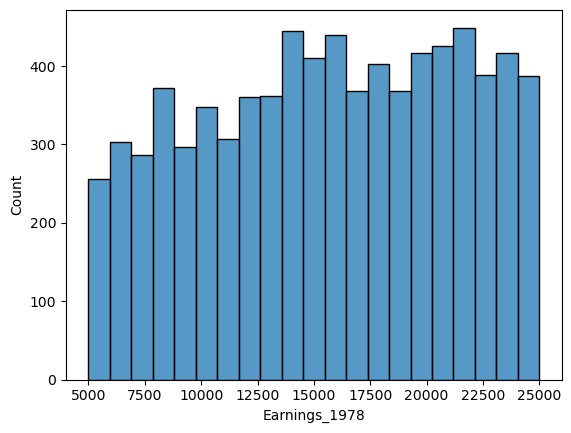

In [117]:
# sns plot for 1978 earnings without outliers

plt.ticklabel_format(style='plain', axis='x')
sns.histplot(round(df_out["Earnings_1978"],-2))

In [118]:
# Percentage of people who earn more than 25000$

earnings= thinkstats2.Cdf(df["Earnings_1978"])
print("percent more than 25k:", round(100-earnings.PercentileRank(25000),2),"%")


percent more than 25k: 27.28 %


In [119]:
# Percentage of people who earn less than 5000$
print("percent less than 5k:", round(earnings.PercentileRank(5000),2),"%")

percent less than 5k: 23.89 %


In [120]:
# Percentage of people who earn between 5000 and 25000
print("percent between 5k and 25k:", earnings.PercentileRank(25000) - earnings.PercentileRank(5000),"%")

percent between 5k and 25k: 48.824412206103055 %


##### Outlier Conclusions


 Around 27% and 23% of population earn more than 25k and less than 5k respectively.
 Considering as outliers and filtering them ,1978 earnings is more evenly distributed between 5k and 25k for around 49% of population.